In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/summary100.csv')
df

filename  \
0   d4ba607e9fbd38b2e15682e3cb2b1c52967fe1f2.txt   
1   c605567fc3da20b9e92ce6dd49f3c71c70a8486b.txt   
2   b52552e986b4d475b3f37758b4d88b075bbaacac.txt   
3   670c94b26d411d8b63bb585751dd09d8c5c41c7d.txt   
4   41005f563b0c2d09063c5a128350c923ad6dfc2f.txt   
..                                           ...   
95  b42f2a7e56a9a7e6dc50031e79e6d1923ee1a6f3.txt   
96  314f2d091b9935388577b2844070b1c3e6746938.txt   
97  af982f89e0390c43b29359c888054cd24cb38d3b.txt   
98  7a1845eef59784cda1694b0de5a480a3a3fc52c1.txt   
99  b52c52e8e0a6ba63b0a7510d963e3f177ca4f676.txt   

                                                 data  \
0   @title\nGenetically-modified cows without horn...   
1   @title\nIvanka will be stay-at-home mom thanks...   
2   @title\nCouple who made # 1m from cocaine and ...   
3   @title\nTale as old as time ! Romantic man sta...   
4   @title\nIs that a renovation or a demolition ?...   
..                                                ...   
95  @title\nTrump will name his Supreme Court just...   
96  @title\nShocking x-rays reveal how a defencele...   
97  @title\nMick Elliott is the former Royal Navy ...   
98  @title\nBritish family saved from drowning by ...   
99  @title\nCounter-terror police carry out major ...   

                                             summary1  \
0   Scientists have created the cows to protect fa...   
1   Ivanka Trump was a constant presence at her fa...   
2   Carl and Donna Honey-Jones used drug dealing e...   
3   Joel Lynch , an Iowa State University senior ,...   
4   Ex-Parramatta mayor John Chedid applied for ad...   
..                                                ...   
95  He committed to having a name by the end of th...   
96  English bull terrier Eric was shot point blank...   
97  Mick Elliott spent more than 30 years in the R...   
98  Joan Lluch , 18 , and Oscar Reyes , 17 , were ...   
99  A multi-investigation is being launched into i...   

                                        selected_text  \
0   title \n geneticallymodified cows horns are cr...   
1   title \n ivanka will be stayathome mom thanks ...   
2   title \n couple made   m cocaine blew    weddi...   
3   title \n tale as old as time   romantic man st...   
4   title \n is that renovation demolition   mayor...   
..                                                ...   
95  title \n trump will name supreme court justice...   
96  title \n shocking xrays reveal how defenceless...   
97  title \n mick elliott is former royal navy int...   
98  title \n british family saved drowning group s...   
99  title \n counterterror police carry major prob...   

                                    generated_summary  
0    Scientists have created cows to protect farme...  
1    ivanka trump is to focus raising four kids wa...  
2    Couple used drug dealing empire to fund lavis...  
3    romantic man stages elaborate beauty beastthe...  
4    Former mayor sought permission to renovate ho...  
..                                                ...  
95   president donald trump will appoint judge to ...  
96   Shocking xrays reveal how defenceless dog was...  
97   mick elliott is former royal navy intelligenc...  
98   british family including tenyearold boy were ...  
99   Counterterror police carry major probe fears ...  

[100 rows x 5 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

summaries = df['generated_summary']
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(summaries)

num_topics = 30
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:10]  # Get indices of top words for the topic
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topic #1: strong, costa, year, face, caption, picture, established, travel, tim, katie
Topic #2: attack, stranded, twitter, people, generosity, islamic, authorities, claimed, facebook, killer
Topic #3: arsenal, wenger, xhaka, granit, man, jacket, anarchy, biker, sons, diego
Topic #4: austin, building, stepdaughter, marissa, describes, car, killer, claims, great, orts
Topic #5: sperm, hardin, appeal, wedding, changes, pictures, response, sent, photographs, extraordinary
Topic #6: swansea, home, pay, expecting, sale, couple, palace, world, liverpool, wo
Topic #7: katie, thought, personal, horse, calendar, victim, best, head, killed, recent
Topic #8: boy, steelers, nfl, bell, british, people, required, shock, trip, built
Topic #9: ivanka, shakers, highclere, mycroft, appear, book, robertson, police, castle, abduljabbar
Topic #10: ip, iwobi, yacht, marco, days, fly, aerospace, card, calories, dinner
Topic #11: allen, mason, appalling, brentford, sky, given, dixon, skystephen, presenter, dr

In [ ]:
topics=["strong","year","face","britain","suicide","washington","twitter","kyle","president","amazon","bezos","tax","army","india","satellites","australian","rocket","inauguration",
        "obama","philippine","british","instagram"]

In [ ]:
import os
import pandas as pd
import re
specified_word = "president"

images_folder = "/content/drive/MyDrive/img"
results = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    summary = row['generated_summary']
    filename = row['filename']

    # Check if the specified word is present in the summary
    if specified_word in summary:
        # Check if the filename is already a key in the dictionary
        if filename not in results:
            results[filename] = []

        # Add reference summary and generated summary to the list under the filename key
        results[filename].append(row['summary1'])
        results[filename].append(summary)

        # Find any image files that start with the same filename (regardless of extension)
        image_files = [f for f in os.listdir(images_folder) if f.startswith(f"{filename}_")]

        if image_files:
            # Print the first image found (you can modify this logic if you want to select a specific one)
            print(f"Image File: {image_files[0]}")
            image_path = os.path.join(images_folder, image_files[0])

            # You can now do something with the image, e.g., display it, process it, etc.
            # Display the image
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Image for {filename}")
            plt.show()
        else:
            print(f"No Image Files found for {filename}")
        print("\n")

# Print the dictionary
print(results)


Filename: c605567fc3da20b9e92ce6dd49f3c71c70a8486b.txt
Reference Summaries: Ivanka Trump was a constant presence at her father 's side on the Apprentice and in real life during countless business deals
Generated Summaries:  ivanka trump is to focus raising four kids washington  husband   jared  ivanka will no longer be involved management operations company . attorney sheri dillon advised  Ethics experts have warned that even move violates least spirit antinepotism legislation enacted after  ivanka also is expected to pick ceremonial roles traditionally associated first lady . melania trump  abigail klem as president to lead brand   will work board trustees to  "I am deeply passionate   including education empowerment women girls   leveling playing field  ivanka also will recuse participating decisions new trump luxury hotel washington   vanity  ivanka will have plenty to keep hands full   ivanka eric will take  ivanka trump's new book ivanka s book is set to be released in March  fe  

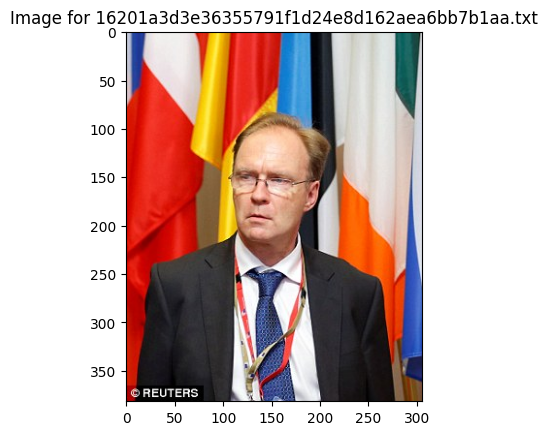

Image File: 16201a3d3e36355791f1d24e8d162aea6bb7b1aa_6.jpg


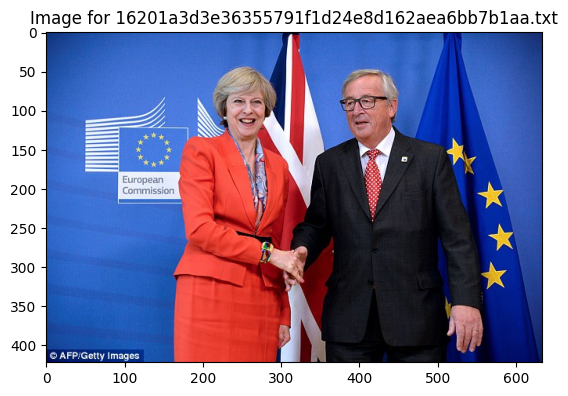

Image File: 16201a3d3e36355791f1d24e8d162aea6bb7b1aa_3.jpg


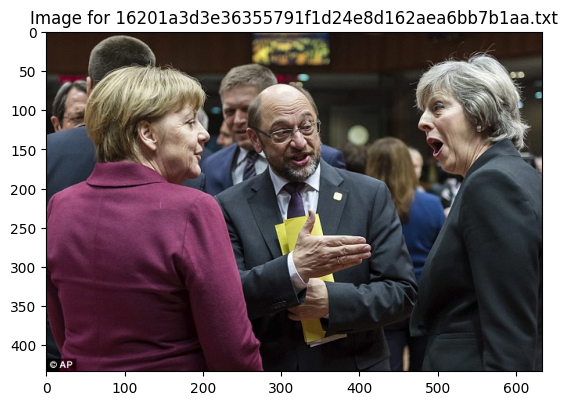

Image File: 16201a3d3e36355791f1d24e8d162aea6bb7b1aa_1.jpg


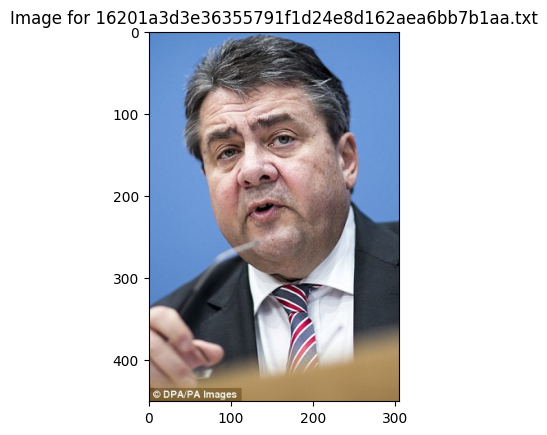

Image File: 16201a3d3e36355791f1d24e8d162aea6bb7b1aa_2.jpg


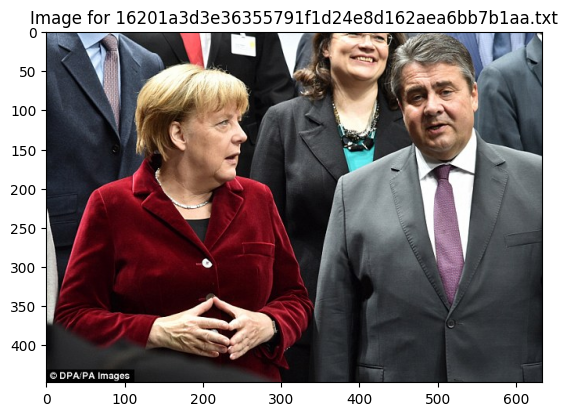

Image File: 16201a3d3e36355791f1d24e8d162aea6bb7b1aa_4.jpg


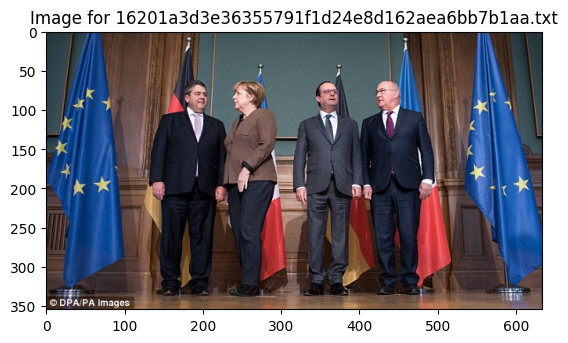

Filename: c2eb8b2046b98ade01a2d2f1ce53cd8c7a753817.txt
Reference Summaries: President Donald Trump has clashed with the media over the size of his inaugural crowd
Generated Summaries:  president donald trump tweets panorama photograph inauguration to hang   press hall . President  The inauguration was th   date prescribed th amendment constitution . Spicer repeated claim that was  World famous photographer abbas shirmohammadi has build reputation taking most beautiful striking  The private studio s web site features photographs multiple political events   as well international real  press secretary sean spicer got grilled on claims being largest inauguration ever . Spicer  The president's inauguration day was   full day metro ridership trump s inauguration day  The remarks were tailored digital tv viewers   however, however   they were tailored  Inauguration statement was nt borne aerial photographs of inauguration . President Obama called journalists
No Image Files found for c2eb8b204

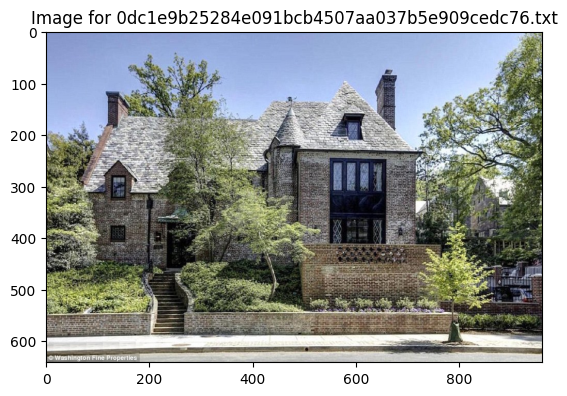

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_9.jpg


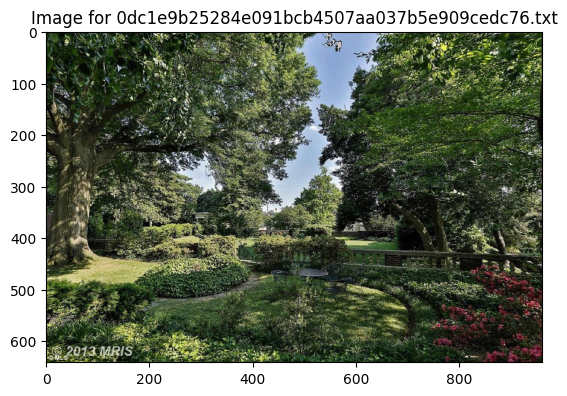

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_3.jpg


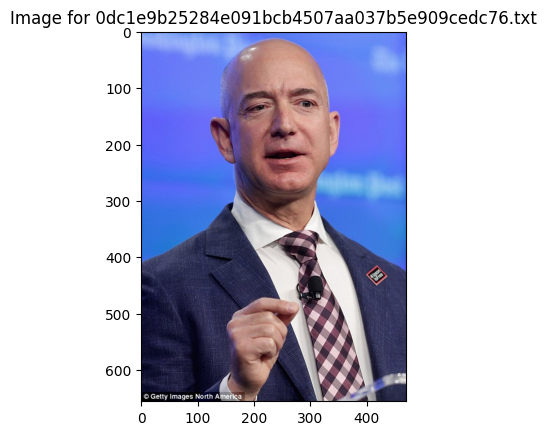

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_6.jpg


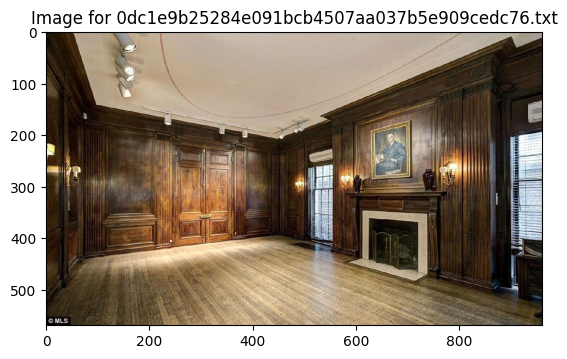

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_4.jpg


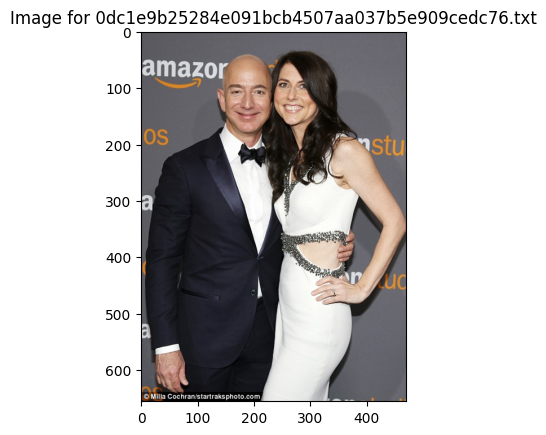

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_5.jpg


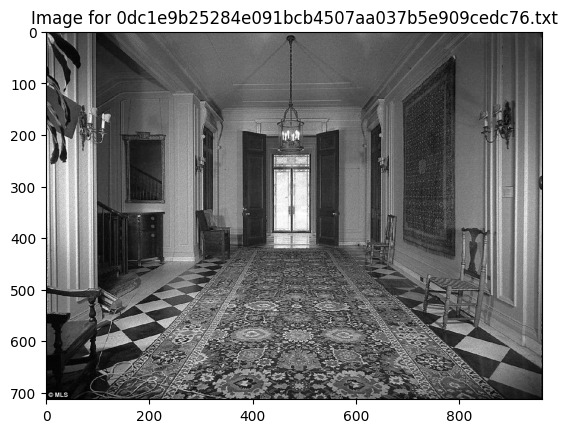

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_8.jpg


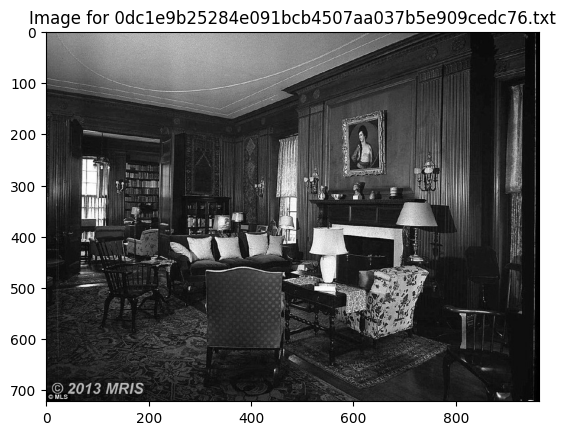

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_1.jpg


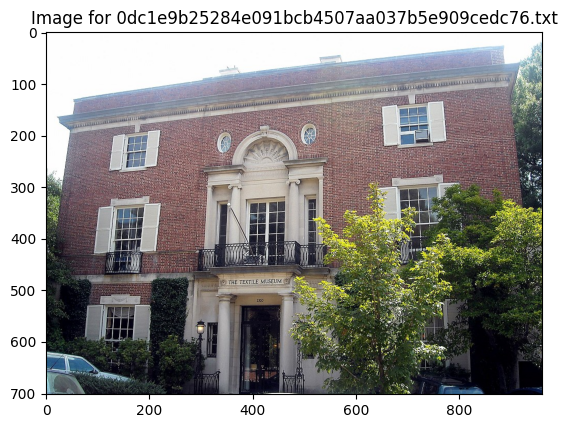

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_10.jpg


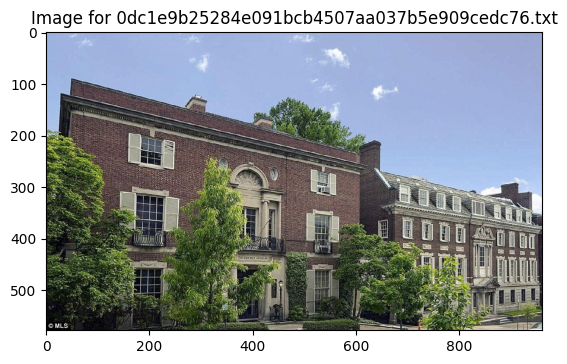

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_7.jpg


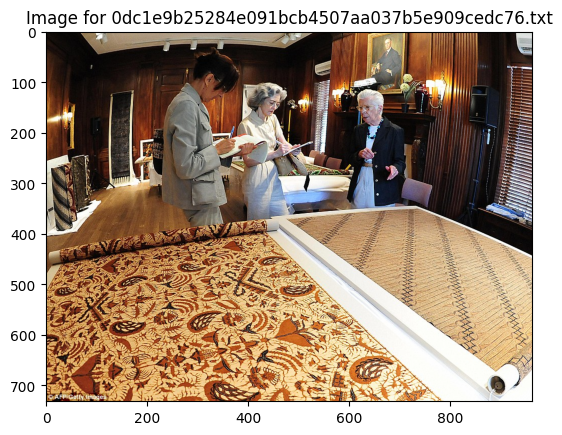

Image File: 0dc1e9b25284e091bcb4507aa037b5e909cedc76_2.jpg


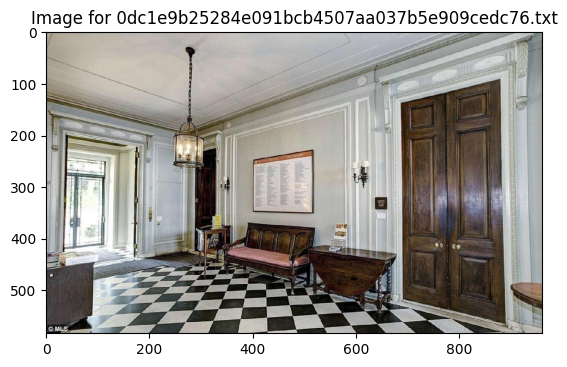

Filename: b42f2a7e56a9a7e6dc50031e79e6d1923ee1a6f3.txt
Reference Summaries: He committed to having a name by the end of this week as he spoke to reporters in the Oval Office , said he would make an announcement next week
Generated Summaries:  president donald trump will appoint judge to fill vacant seat supreme court early next week .  The president reportedly whittled down his initial list down to three male appeals court judges  Senators meeting gave little away discussion afterward . Chuck grassley said trump s entire list possible  republicans prevented obama s nominee merrick garland garland from getting hearing vote  scalia s place  included utah sen mike lee   neil  senate democrats will oppose consider to be   mainstream judges, schumer has refused  schumer told cnn sunday    that if do nt    White House cast meeting lawmakers today important opportunity for president to consult senate leaders sides aisle potential  senate must vote eight more votes to put trump s nominee court

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have the result_dict and images_folder defined
images_folder = "/content/drive/MyDrive/img"
# Iterate through the keys and values of the result_dict
for key, value in results.items():
    print(f"Filename: {key}")
    print(f"Reference Summaries: {value[0]}")
    print(f"Generated Summaries: {value[1]}")

    # Remove the ".txt" extension from the key
    key_without_extension = os.path.splitext(key)[0]

    # Search for image files with the modified key (up to an underscore) in the images dataset folder
    matching_images = []

    for f in os.listdir(images_folder):
        if f.startswith(f"{key_without_extension}_") and (f.lower().endswith(".jpg") or f.lower().endswith(".npy")):
            matching_images.append(f)

    if matching_images:
        # Display the matching images
        for image_file in matching_images:
            print(f"Image File: {image_file}")
            image_path = os.path.join(images_folder, image_file)

            # Check the file extension to determine how to display the image
            if image_file.lower().endswith(".jpg"):
                img = plt.imread(image_path)
                plt.imshow(img)
                plt.title(f"Image for {key}")
                plt.show()
            elif image_file.lower().endswith(".npy"):
                # Handle .npy image format as needed (e.g., loading and displaying)
                pass
    else:
        print(f"No Image Files found for {key}")
        print("\n")
